In [1]:
import os
import sys
import random
import tarfile
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import imageio
from sklearn.linear_model import LogisticRegression
from six.moves.urllib.request import urlretrieve
from six.moves import cPickle as pickle
import hashlib

#### 1. Загрузите данные и отобразите на экране несколько из изображений с помощью языка Python

In [2]:
num_classes = 10
np.random.seed(133)

In [3]:
def extract(filename, force=False):
    root = os.path.splitext(os.path.splitext(filename)[0])[0]  # remove .tar.gz
    if os.path.isdir(root) and not force:
        # You may override by setting force=True.
        print('%s already present - Skipping extraction of %s.' % (root, filename))
    else:
        print('Extracting data for %s. This may take a while. Please wait.' % root)
        tar = tarfile.open(filename)
        sys.stdout.flush()
        tar.extractall(path=os.path.dirname(root))
        tar.close()

    data_folders = [
        os.path.join(root, d) for d in sorted(os.listdir(root))
        if os.path.isdir(os.path.join(root, d))]

    print(data_folders)

    return data_folders

In [4]:
train_folders = extract('data/assignment1/notMNIST_large.tar.gz')
test_folders = extract('data/assignment1/notMNIST_small.tar.gz')

data/assignment1/notMNIST_large already present - Skipping extraction of data/assignment1/notMNIST_large.tar.gz.
['data/assignment1/notMNIST_large/A', 'data/assignment1/notMNIST_large/B', 'data/assignment1/notMNIST_large/C', 'data/assignment1/notMNIST_large/D', 'data/assignment1/notMNIST_large/E', 'data/assignment1/notMNIST_large/F', 'data/assignment1/notMNIST_large/G', 'data/assignment1/notMNIST_large/H', 'data/assignment1/notMNIST_large/I', 'data/assignment1/notMNIST_large/J']
data/assignment1/notMNIST_small already present - Skipping extraction of data/assignment1/notMNIST_small.tar.gz.
['data/assignment1/notMNIST_small/A', 'data/assignment1/notMNIST_small/B', 'data/assignment1/notMNIST_small/C', 'data/assignment1/notMNIST_small/D', 'data/assignment1/notMNIST_small/E', 'data/assignment1/notMNIST_small/F', 'data/assignment1/notMNIST_small/G', 'data/assignment1/notMNIST_small/H', 'data/assignment1/notMNIST_small/I', 'data/assignment1/notMNIST_small/J']


In [5]:
def plot_samples(data_folders, sample_size, title):
    fig = plt.figure()
    fig.suptitle(title, fontsize=16, fontweight='bold')

    for folder in data_folders:
        image_files = os.listdir(folder)
        image_sample = random.sample(image_files, sample_size)
        for image in image_sample:
            image_file = os.path.join(folder, image)
            ax = fig.add_subplot(len(data_folders), sample_size, sample_size * data_folders.index(folder) +
                                 image_sample.index(image) + 1)
            image = mpimg.imread(image_file)
            ax.imshow(image)
            ax.set_axis_off()

    plt.show()

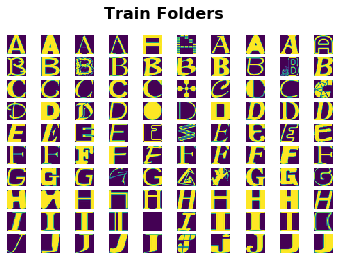

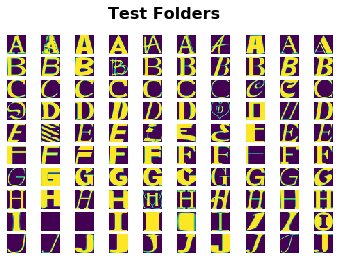

In [6]:
plot_samples(train_folders, 10, 'Train Folders')
plot_samples(test_folders, 10, 'Test Folders')

#### 2. Проверьте, что классы являются сбалансированными, т.е. количество изображений, принадлежащих каждому из классов, примерно одинаково (В данной задаче 10 классов).

In [7]:
image_size = 28  # Pixel width and height.
pixel_depth = 255.0  # Number of levels per pixel.

In [8]:
def load_letter(folder, min_num_images):
    """Load the data for a single letter label."""

    image_files = os.listdir(folder)
    dataset = np.ndarray(shape=(len(image_files), image_size, image_size), dtype=np.float32)

    print(folder)
    num_images = 0

    for image in image_files:
        image_file = os.path.join(folder, image)
        try:
            image_data = (imageio.imread(image_file).astype(float) -
                          pixel_depth / 2) / pixel_depth
            if image_data.shape != (image_size, image_size):
                raise Exception('Unexpected image shape: %s' % str(image_data.shape))
            dataset[num_images, :, :] = image_data
            num_images = num_images + 1
        except Exception as e:
            print('Could not read:', image_file, ':', e)

    dataset = dataset[0:num_images, :, :]

    if num_images < min_num_images:
        raise Exception('Many fewer images than expected: %d < %d' % (num_images, min_num_images))

    return dataset

In [9]:
def pickle_dataset(data_folders, min_num_images_per_class):
    dataset_names = []
    for folder in data_folders:
        set_filename = folder + '.pickle'
        dataset_names.append(set_filename)
        if os.path.exists(set_filename):
            # You may override by setting force=True.
            print('%s already present - Skipping pickling.' % set_filename)
        else:
            print('Pickling %s.' % set_filename)
            dataset = load_letter(folder, min_num_images_per_class)
            try:
                with open(set_filename, 'wb') as f:
                    pickle.dump(dataset, f, pickle.HIGHEST_PROTOCOL)
            except Exception as e:
                print('Unable to save data to', set_filename, ':', e)

    return dataset_names

In [10]:
train_datasets = pickle_dataset(train_folders, 45000)
test_datasets = pickle_dataset(test_folders, 1800)

data/assignment1/notMNIST_large/A.pickle already present - Skipping pickling.
data/assignment1/notMNIST_large/B.pickle already present - Skipping pickling.
data/assignment1/notMNIST_large/C.pickle already present - Skipping pickling.
data/assignment1/notMNIST_large/D.pickle already present - Skipping pickling.
data/assignment1/notMNIST_large/E.pickle already present - Skipping pickling.
data/assignment1/notMNIST_large/F.pickle already present - Skipping pickling.
data/assignment1/notMNIST_large/G.pickle already present - Skipping pickling.
data/assignment1/notMNIST_large/H.pickle already present - Skipping pickling.
data/assignment1/notMNIST_large/I.pickle already present - Skipping pickling.
data/assignment1/notMNIST_large/J.pickle already present - Skipping pickling.
data/assignment1/notMNIST_small/A.pickle already present - Skipping pickling.
data/assignment1/notMNIST_small/B.pickle already present - Skipping pickling.
data/assignment1/notMNIST_small/C.pickle already present - Skipp

In [11]:
def generate_fake_label(sizes):
    labels = np.ndarray(sum(sizes), dtype=np.int32)
    start = 0
    end = 0
    for label, size in enumerate(sizes):
        start = end
        end += size
        for j in range(start, end):
            labels[j] = label
    return labels

In [12]:
def plot_balance():
    fig, ax = plt.subplots(1, 2)
    bins = np.arange(train_labels.min(), train_labels.max() + 2)
    ax[0].hist(train_labels, bins=bins)
    ax[0].set_xticks((bins[:-1] + bins[1:]) / 2, [chr(k) for k in range(ord("A"), ord("J") + 1)])
    ax[0].set_title("Training data")

    bins = np.arange(test_labels.min(), test_labels.max() + 2)
    ax[1].hist(test_labels, bins=bins)
    ax[1].set_xticks((bins[:-1] + bins[1:]) / 2, [chr(k) for k in range(ord("A"), ord("J") + 1)])
    ax[1].set_title("Test data")
    plt.show()

In [13]:
def mean(numbers):
    return float(sum(numbers)) / max(len(numbers), 1)

In [14]:
def balance_check(sizes):
    mean_val = mean(sizes)
    print('mean of # images :', mean_val)
    for i in sizes:
        if abs(i - mean_val) > 0.1 * mean_val:
            print("Too much or less images")
        else:
            print("Well balanced", i)

In [15]:
def load_and_display_pickle(datasets, sample_size, title):
    fig = plt.figure()
    fig.suptitle(title, fontsize=16, fontweight='bold')

    num_of_images = []

    for pickle_file in datasets:
        with open(pickle_file, 'rb') as f:
            data = pickle.load(f)
            print('Total images in', pickle_file, ':', len(data))

            for index, image in enumerate(data):
                if index == sample_size: break
                ax = fig.add_subplot(len(datasets), sample_size, sample_size * datasets.index(pickle_file) +
                                     index + 1)
                ax.imshow(image)
                ax.set_axis_off()
                ax.imshow(image)

            num_of_images.append(len(data))

    balance_check(num_of_images)
    plt.show()
    return num_of_images

Total images in data/assignment1/notMNIST_small/A.pickle : 1872
Total images in data/assignment1/notMNIST_small/B.pickle : 1873
Total images in data/assignment1/notMNIST_small/C.pickle : 1873
Total images in data/assignment1/notMNIST_small/D.pickle : 1873
Total images in data/assignment1/notMNIST_small/E.pickle : 1873
Total images in data/assignment1/notMNIST_small/F.pickle : 1872
Total images in data/assignment1/notMNIST_small/G.pickle : 1872
Total images in data/assignment1/notMNIST_small/H.pickle : 1872
Total images in data/assignment1/notMNIST_small/I.pickle : 1872
Total images in data/assignment1/notMNIST_small/J.pickle : 1872
mean of # images : 1872.4
Well balanced 1872
Well balanced 1873
Well balanced 1873
Well balanced 1873
Well balanced 1873
Well balanced 1872
Well balanced 1872
Well balanced 1872
Well balanced 1872
Well balanced 1872
Total images in data/assignment1/notMNIST_large/A.pickle : 52909
Total images in data/assignment1/notMNIST_large/B.pickle : 52911
Total images i

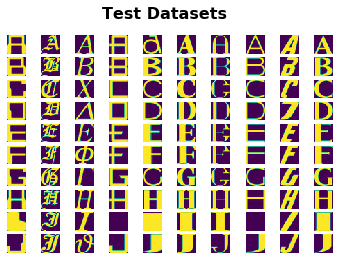

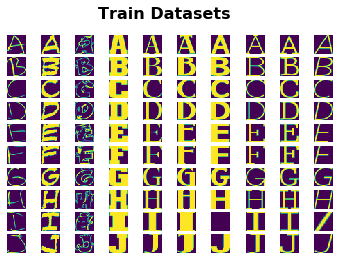

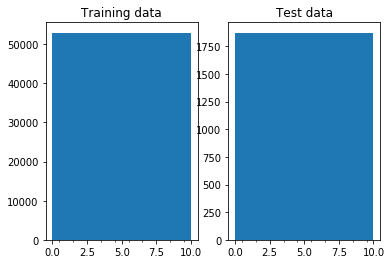

In [16]:
test_labels = generate_fake_label(load_and_display_pickle(test_datasets, 10, 'Test Datasets'))
train_labels = generate_fake_label(load_and_display_pickle(train_datasets, 10, 'Train Datasets'))
plot_balance()

#### 3. Разделите данные на три подвыборки: обучающую (200 тыс. изображений), валидационную (10 тыс. изображений) и контрольную (тестовую) (19 тыс. изображений);

In [17]:
def make_arrays(nb_rows, img_size):
    if nb_rows:
        dataset = np.ndarray((nb_rows, img_size, img_size), dtype=np.float32)
        labels = np.ndarray(nb_rows, dtype=np.int32)
    else:
        dataset, labels = None, None
    return dataset, labels

In [18]:
def merge_datasets(pickle_files, train_size, valid_size=0):
    num_classes = len(pickle_files)
    valid_dataset, valid_labels = make_arrays(valid_size, image_size)
    train_dataset, train_labels = make_arrays(train_size, image_size)
    vsize_per_class = valid_size // num_classes
    tsize_per_class = train_size // num_classes

    start_v, start_t = 0, 0
    end_v, end_t = vsize_per_class, tsize_per_class
    end_l = vsize_per_class + tsize_per_class
    for label, pickle_file in enumerate(pickle_files):
        try:
            with open(pickle_file, 'rb') as f:
                letter_set = pickle.load(f)
                # let's shuffle the letters to have random validation and training set
                np.random.shuffle(letter_set)
                if valid_dataset is not None:
                    valid_letter = letter_set[:vsize_per_class, :, :]
                    valid_dataset[start_v:end_v, :, :] = valid_letter
                    valid_labels[start_v:end_v] = label
                    start_v += vsize_per_class
                    end_v += vsize_per_class

                train_letter = letter_set[vsize_per_class:end_l, :, :]
                train_dataset[start_t:end_t, :, :] = train_letter
                train_labels[start_t:end_t] = label
                start_t += tsize_per_class
                end_t += tsize_per_class
        except Exception as e:
            print('Unable to process data from', pickle_file, ':', e)
            raise

    return valid_dataset, valid_labels, train_dataset, train_labels

In [19]:
train_size = 200000
valid_size = 10000
test_size = 10000

valid_dataset, valid_labels, train_dataset, train_labels = merge_datasets(train_datasets, train_size, valid_size)
_, _, test_dataset, test_labels = merge_datasets(test_datasets, test_size)

print('Training:', train_dataset.shape, train_labels.shape)
print('Validation:', valid_dataset.shape, valid_labels.shape)
print('Testing:', test_dataset.shape, test_labels.shape)

Training: (200000, 28, 28) (200000,)
Validation: (10000, 28, 28) (10000,)
Testing: (10000, 28, 28) (10000,)


#### 4. Проверьте, что данные из обучающей выборки не пересекаются с данными из валидационной и контрольной выборок. Другими словами, избавьтесь от дубликатов в обучающей выборке.

In [20]:
def shuffle(dataset, labels):
    permutation = np.random.permutation(labels.shape[0])
    shuffled_dataset = dataset[permutation, :, :]
    shuffled_labels = labels[permutation]
    return shuffled_dataset, shuffled_labels

In [21]:
train_dataset, train_labels = shuffle(train_dataset, train_labels)
test_dataset, test_labels = shuffle(test_dataset, test_labels)
valid_dataset, valid_labels = shuffle(valid_dataset, valid_labels)

In [22]:
def display_dataset(data, title, sample_size):
    fig = plt.figure()
    fig.suptitle(title, fontsize=16, fontweight='bold')
    for index, image in enumerate(data):
        if index == sample_size * 10: break
        ax = fig.add_subplot(10, sample_size, index + 1)
        ax.imshow(image)
        ax.set_axis_off()
        ax.imshow(image)

    plt.show()

In [23]:
def plot_sample_dataset(dataset, labels, title):
    plt.suptitle(title, fontsize=16, fontweight='bold')
    items = random.sample(range(len(labels)), 12)
    for i, item in enumerate(items):
        plt.subplot(3, 4, i + 1)
        plt.axis('off')
        plt.title(chr(ord('A') + labels[item]))
        plt.imshow(dataset[item])
    plt.show()

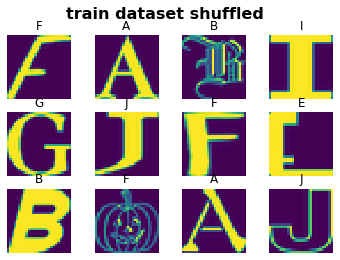

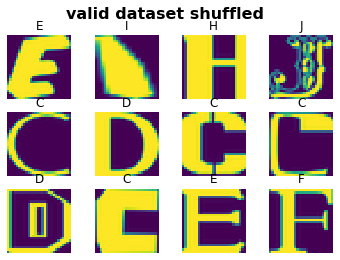

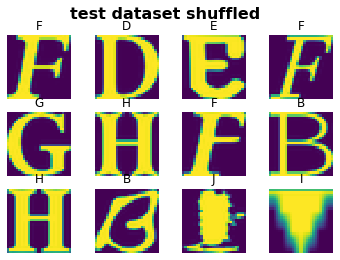

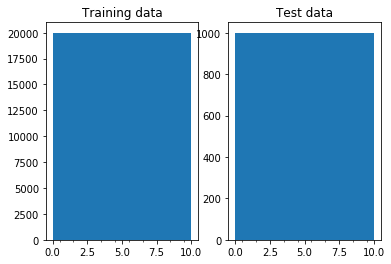

In [24]:
plot_sample_dataset(train_dataset, train_labels, 'train dataset shuffled')
plot_sample_dataset(valid_dataset, valid_labels, 'valid dataset shuffled')
plot_sample_dataset(test_dataset, test_labels, 'test dataset shuffled')
plot_balance()

In [25]:
pickle_file = 'notMNIST.pickle'

try:
    f = open(pickle_file, 'wb')
    save = {
        'train_dataset': train_dataset,
        'train_labels': train_labels,
        'valid_dataset': valid_dataset,
        'valid_labels': valid_labels,
        'test_dataset': test_dataset,
        'test_labels': test_labels,
    }
    pickle.dump(save, f, pickle.HIGHEST_PROTOCOL)
    f.close()
except Exception as e:
    print('Unable to save data to', pickle_file, ':', e)
    raise

statinfo = os.stat(pickle_file)
print('Compressed pickle size:', statinfo.st_size)

Compressed pickle size: 690800506


In [26]:
def extract_overlap_hash_where(dataset_1, dataset_2):
    dataset_hash_1 = np.array([hashlib.sha256(img).hexdigest() for img in dataset_1])
    dataset_hash_2 = np.array([hashlib.sha256(img).hexdigest() for img in dataset_2])
    overlap = {}
    for i, hash1 in enumerate(dataset_hash_1):
        duplicates = np.where(dataset_hash_2 == hash1)
        if len(duplicates[0]):
            overlap[i] = duplicates[0]
    return overlap

In [27]:
def display_overlap(overlap, source_dataset, target_dataset):
    overlap = {k: v for k, v in overlap.items() if len(v) >= 3}
    item = random.choice(list(overlap.keys()))
    imgs = np.concatenate(([source_dataset[item]], target_dataset[overlap[item][0:7]]))
    plt.suptitle(item)
    for i, img in enumerate(imgs):
        plt.subplot(2, 4, i + 1)
        plt.axis('off')
        plt.imshow(img)

    plt.show()

In [28]:
def sanitize(dataset_1, dataset_2, labels_1):
    dataset_hash_1 = np.array([hashlib.sha256(img).hexdigest() for img in dataset_1])
    dataset_hash_2 = np.array([hashlib.sha256(img).hexdigest() for img in dataset_2])
    overlap = []  # list of indexes
    for i, hash1 in enumerate(dataset_hash_1):
        duplicates = np.where(dataset_hash_2 == hash1)
        if len(duplicates[0]):
            overlap.append(i)
    return np.delete(dataset_1, overlap, 0), np.delete(labels_1, overlap, None)

Number of overlaps: 1258


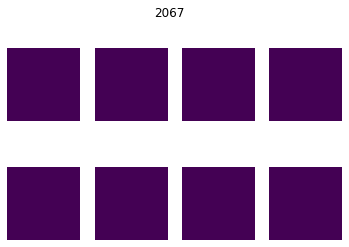

In [41]:
overlap_test_train = extract_overlap_hash_where(test_dataset, train_dataset)
print('Number of overlaps:', len(overlap_test_train.keys()))

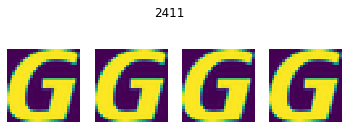

In [69]:
display_overlap(overlap_test_train, test_dataset, train_dataset)

In [ ]:
test_dataset_sanit, test_labels_sanit = sanitize(test_dataset, train_dataset, test_labels)
print('Overlapping images removed from test_dataset: ', len(test_dataset) - len(test_dataset_sanit))
valid_dataset_sanit, valid_labels_sanit = sanitize(valid_dataset, train_dataset, valid_labels)
print('Overlapping images removed from valid_dataset: ', len(valid_dataset) - len(valid_dataset_sanit))
print('Training:', train_dataset.shape, train_labels.shape)
print('Validation:', valid_labels_sanit.shape, valid_labels_sanit.shape)
print('Testing:', test_dataset_sanit.shape, test_labels_sanit.shape)
pickle_file_sanit = 'notMNIST_sanit.pickle'

In [30]:
try:
    f = open(pickle_file_sanit, 'wb')
    save = {
        'train_dataset': train_dataset,
        'train_labels': train_labels,
        'valid_dataset': valid_dataset_sanit,
        'valid_labels': valid_labels_sanit,
        'test_dataset': test_dataset_sanit,
        'test_labels': test_labels_sanit,
    }
    pickle.dump(save, f, pickle.HIGHEST_PROTOCOL)
    f.close()
except Exception as e:
    print('Unable to save data to', pickle_file, ':', e)
    raise

statinfo = os.stat(pickle_file_sanit)
print('Compressed pickle size:', statinfo.st_size)

Compressed pickle size: 683518846


#### 5. Постройте простейший классификатор (например, с помощью логистической регрессии). Постройте график зависимости точности классификатора от размера обучающей выборки (50, 100, 1000, 50000). Для построения классификатора можете использовать библиотеку SkLearn (http://scikit-learn.org).

In [31]:
def disp_sample_dataset(dataset, labels, title=None):
    fig = plt.figure()
    if title: fig.suptitle(title, fontsize=16, fontweight='bold')
    items = random.sample(range(len(labels)), 8)
    for i, item in enumerate(items):
        plt.subplot(2, 4, i + 1)
        plt.axis('off')
        plt.title(chr(ord('A') + labels[item]))
        plt.imshow(dataset[item])
    plt.show()

In [36]:
def train_and_predict(sample_size):
    regr = LogisticRegression()
    X_train = train_dataset[:sample_size].reshape(sample_size, 784)
    y_train = train_labels[:sample_size]
    regr.fit(X_train, y_train)

    X_test = test_dataset.reshape(test_dataset.shape[0], 28 * 28)
    y_test = test_labels

    pred_labels = regr.predict(X_test)

    accuracy = regr.score(X_test, y_test)
    print('Accuracy:', accuracy, 'when sample_size=', sample_size)
    disp_sample_dataset(test_dataset, pred_labels, 'sample_size=' + str(sample_size))
    return accuracy

/Users/konstantin/PycharmProjects/deep-learning-course/env/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/konstantin/PycharmProjects/deep-learning-course/env/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative so

Accuracy: 0.6362 when sample_size= 50
Accuracy: 0.7127 when sample_size= 100
Accuracy: 0.8379 when sample_size= 1000
Accuracy: 0.8397 when sample_size= 5000
Accuracy: 0.8953 when sample_size= 200000


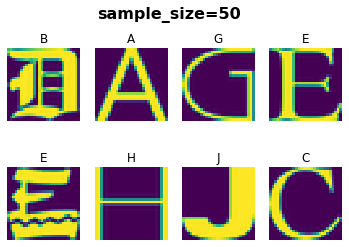

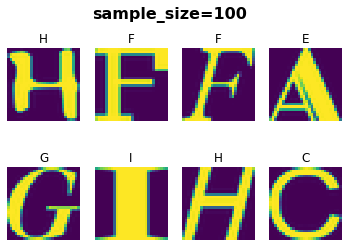

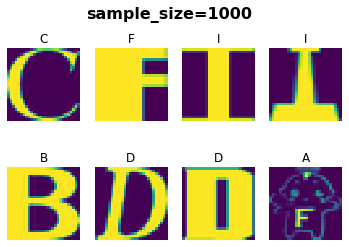

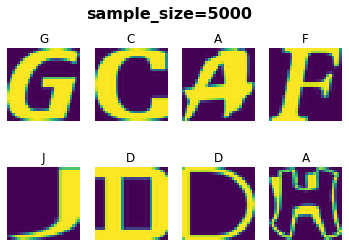

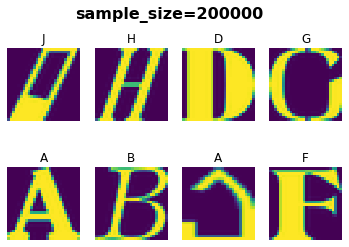

In [37]:
samples = [50, 100, 1000, 5000, len(train_dataset)]
accuracies = []
for sample_size in samples:
    accuracies.append(train_and_predict(sample_size))
    

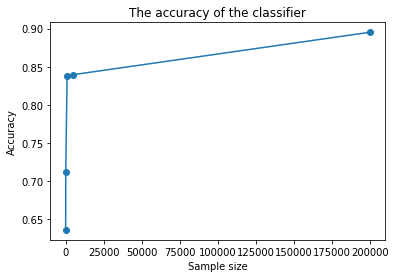

In [40]:
plt.plot(samples, accuracies, 'o-')
plt.title('The accuracy of the classifier')
plt.ylabel('Accuracy')
plt.xlabel('Sample size')
plt.show()
